<a href="https://colab.research.google.com/github/parrisatwork/Data-Predictions/blob/main/Adult_Income_Parris_Trimingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

## **Imports**

In [ ]:
#Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style('white')
import pandas as pd
import numpy as np
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [ ]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/adult income.csv')

In [ ]:
# Gathering parameters:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Preliminary: Before we break open the following project, it is good to get a hypothesis about what is to come. This is being made prior to research.

1. Source of data:
http://www.cs.toronto.edu/~delve/data/adult/desc.html

2. Brief description of data: 
- "An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc."

3. What is the target?
- to predict an individual’s annual income based off of various factors

4. What does one row represent? (A person?  A business?  An event? A product?)
- A person

5. Is this a classification or regression problem?
- Classification or possible regression, depending on the request

6. How many features does the data have?
- 10

7. How many rows are in the dataset?
- 48,842

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- In cleaning, there are almost 50,000 rows, meaning there will be a lot of information that we do not require; and this will have to be adjusted or removed.
- One advantage, however, is that we do not see any missing data. But, being the professionals we are, we will check later.

In [ ]:
# Identify Columns
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

## **Clean Data**


### Delete Unnecessary Columns

In [ ]:
# Remove Unnecessary Columns
df.drop(columns=['fnlwgt','educational-num','race','capital-gain','capital-loss'], inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Delete Duplicate Rows

In [ ]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 8911 duplicate rows.


In [ ]:
# Drop duplicte rows
df.drop_duplicates(inplace=True)

In [ ]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Identify and Correct Inconsistencies in Categorical Values

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,gender,native-country,income
count,39931,39931,39931,39931,39931,39931,39931,39931
unique,9,16,7,15,6,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K
freq,26171,11917,17670,5356,15162,26044,34971,30504


#### Address "?"

In [ ]:
df.isin(['?']).sum()

age                  0
workclass         2306
education            0
marital-status       0
occupation        2316
relationship         0
gender               0
hours-per-week       0
native-country     849
income               0
dtype: int64

In [ ]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [ ]:
df.isin(['?']).sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Categorial Cleanup

In [ ]:
# Checking for discrepancies in categorical data column 'Workclass'
df['workclass'].value_counts()

Private             26171
Self-emp-not-inc     3669
Local-gov            2894
State-gov            1895
Self-emp-inc         1606
Federal-gov          1359
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Education'
df['education'].value_counts()

HS-grad         11917
Some-college     8613
Bachelors        6427
Masters          2354
Assoc-voc        1900
Assoc-acdm       1545
11th             1536
10th             1235
7th-8th           913
Prof-school       771
9th               731
12th              607
Doctorate         565
5th-6th           495
1st-4th           241
Preschool          81
Name: education, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Marital Status'
df['marital-status'].value_counts()

Married-civ-spouse       16428
Never-married            11441
Divorced                  5724
Separated                 1381
Widowed                   1254
Married-spouse-absent      551
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Occupation'
df['occupation'].value_counts()

Prof-specialty       5194
Exec-managerial      4932
Adm-clerical         4443
Sales                4365
Craft-repair         4214
Other-service        4070
Machine-op-inspct    2239
Transport-moving     1910
Handlers-cleaners    1603
Farming-fishing      1403
Tech-support         1284
Protective-serv       911
Priv-house-serv       229
Armed-Forces           14
Name: occupation, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Relationship'
df['relationship'].value_counts()

Husband           14189
Not-in-family     10153
Own-child          4809
Unmarried          4418
Wife               1942
Other-relative     1300
Name: relationship, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Gender'
df['gender'].value_counts()

Male      24212
Female    12599
Name: gender, dtype: int64

In [ ]:
# Checking for discrepancies in categorical data column 'Native Country'
df['native-country'].value_counts()

United-States                 32922
Mexico                          872
Philippines                     280
Germany                         192
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         102
South                           101
Italy                            99
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           54
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [ ]:
# Checking for discrepancies in categorical data column 'Income'
df['income'].value_counts()

<=50K    27846
>50K      8965
Name: income, dtype: int64

### Identify and Addressed Missing Values

In [ ]:
df.isnull().sum()

age                  0
workclass         2306
education            0
marital-status       0
occupation        2316
relationship         0
gender               0
hours-per-week       0
native-country     849
income               0
dtype: int64

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 5471 missing values.


In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


### Univariate Visuals for the Target

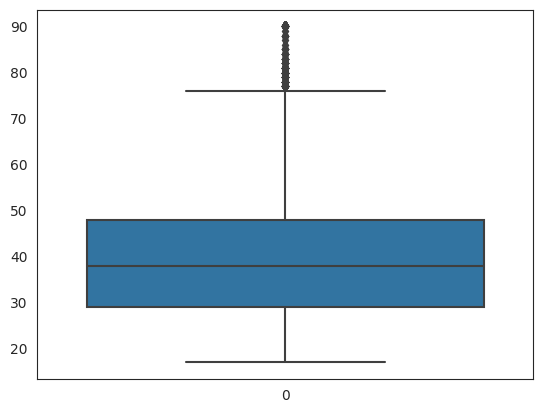

In [39]:
sns.boxplot(df['age']);

- The Outliers seen with Age are everything above 80 years old to 100 years old.

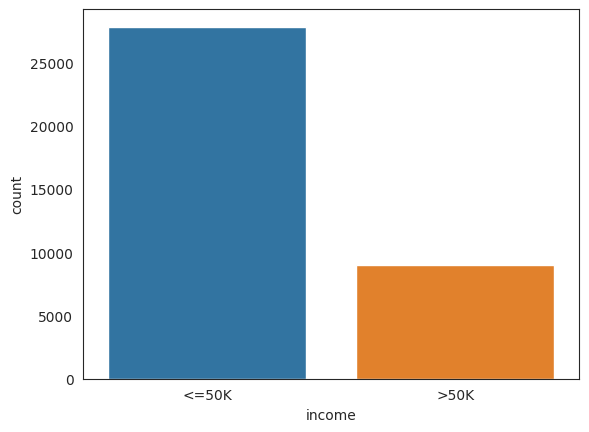

In [40]:
sns.countplot(df, x='income');

- The above chart shows just how many around the world, that were surveyed, make and income above and below the $50,000 line.